In [1]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [2]:
# Creating data to view and feed

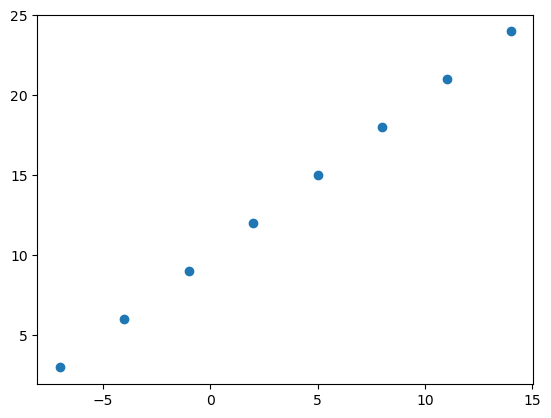

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Create the features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visulize it
plt.scatter(x,y);

In [4]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
# Inputs and Outputs Shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["beadroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

2023-08-20 11:52:33.692927: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-08-20 11:52:33.692964: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-20 11:52:33.692974: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-20 11:52:33.693099: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-20 11:52:33.695778: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beadroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
x[0],y[0]

(-7.0, 3.0)

In [8]:
x[1],y[1]

(-4.0, 6.0)

In [9]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [10]:
x[0].ndim

0

In [11]:
# Turn our Numpy arrays into tensor

In [12]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

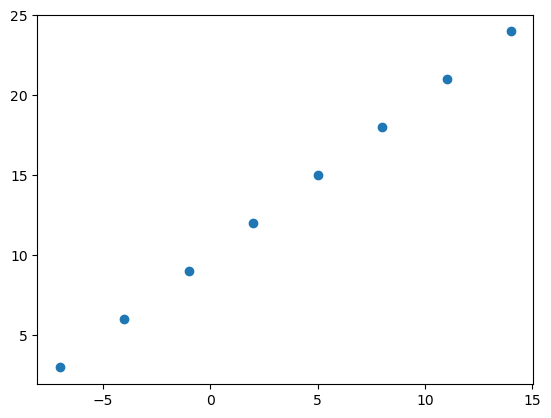

In [14]:
plt.scatter(x,y)

In [15]:
#Modelling with Tensorflow

In [16]:
# 1.Create a model using the Sequential API
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.legacy.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])
# 3. Fit the model
# model.fit(x,y,epochs=5)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

# 4.Evaluate the model
# model.evaluate(x_test,y_test)

Epoch 1/5
1/1 [==============================] - 0s 206ms/step - loss: 11.5841 - mae: 11.5841
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.4516 - mae: 11.4516
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3191 - mae: 11.3191
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1866 - mae: 11.1866
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 11.0541 - mae: 11.0541


2023-08-20 11:52:34.136878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [17]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 42ms/step


2023-08-20 11:52:34.322458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[12.330841]], dtype=float32)

In [19]:
# Imporving our model

In [20]:
# 1. Create the model
model=tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)
#2.Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.legacy.Adam(lr=0.0001),
             metrics=["mae"] 
             )

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - ETA: 0s - loss: 12.4236 - mae: 12.4236

/Users/ashfaqkhanrafin/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-08-20 11:52:34.450327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 155ms/step - loss: 12.4236 - mae: 12.4236
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 12.4232 - mae: 12.4232
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 12.4227 - mae: 12.4227
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 12.4223 - mae: 12.4223
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 12.4218 - mae: 12.4218


In [21]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 27ms/step


2023-08-20 11:52:34.594282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[5.237014]], dtype=float32)

In [22]:
# Lets rebuild the model

# 1.Create the model
model=tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

# 2.Compile the Model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)
#3.fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 115ms/step - loss: 9.4510 - mae: 9.4510
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3185 - mae: 9.3185
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1860 - mae: 9.1860
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0535 - mae: 9.0535
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9210 - mae: 8.9210
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7885 - mae: 8.7885
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6560 - mae: 8.6560
Epoch 8/100


2023-08-20 11:52:34.698138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 5ms/step - loss: 8.5235 - mae: 8.5235
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3910 - mae: 8.3910
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2585 - mae: 8.2585
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1260 - mae: 8.1260
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 7.9935 - mae: 7.9935
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8610 - mae: 7.8610
Epoch 14/100
1/1 [==============================] - 0s 5ms/step - loss: 7.7285 - mae: 7.7285
Epoch 15/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5960 - mae: 7.5960
Epoch 16/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4635 - mae: 7.4635
Epoch 17/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3800 - mae: 7.3800
Epoch 18/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3744 - mae

In [23]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 26ms/step


2023-08-20 11:52:35.471464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[29.976524]], dtype=float32)

In [24]:
#Adding Adam optimizer
# Lets rebuild the model

# 1.Create the model
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50,activation=None),
        tf.keras.layers.Dense(1)
    ]
)

# 2.Compile the Model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]
)
#3.fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 216ms/step - loss: 11.9634 - mae: 11.9634
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2752 - mae: 11.2752
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5829 - mae: 10.5829
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8843 - mae: 9.8843
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1765 - mae: 9.1765
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4567 - mae: 8.4567
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.7219 - mae: 7.7219
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9694 - mae: 6.9694
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9258 - mae: 6.9258
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2398 - mae: 7.2398
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss:

2023-08-20 11:52:35.687073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 6ms/step - loss: 7.1208 - mae: 7.1208
Epoch 16/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8845 - mae: 6.8845
Epoch 17/100
1/1 [==============================] - 0s 6ms/step - loss: 6.6285 - mae: 6.6285
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3573 - mae: 6.3573
Epoch 19/100
1/1 [==============================] - 0s 6ms/step - loss: 6.2631 - mae: 6.2631
Epoch 20/100
1/1 [==============================] - 0s 6ms/step - loss: 6.2143 - mae: 6.2143
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3286 - mae: 6.3286
Epoch 22/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3913 - mae: 6.3913
Epoch 23/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3554 - mae: 6.3554
Epoch 24/100
1/1 [==============================] - 0s 6ms/step - loss: 6.2331 - mae: 6.2331
Epoch 25/100
1/1 [==============================] - 0s 6ms/step - loss: 6.0336 - ma

In [25]:
model.predict([17.0,7.0])

1/1 [==============================] - 0s 34ms/step


2023-08-20 11:52:36.581554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[27.80574 ],
       [17.370941]], dtype=float32)

In [26]:
##Evaluting a model

In [27]:
x=tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [28]:
y=x+10

In [29]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

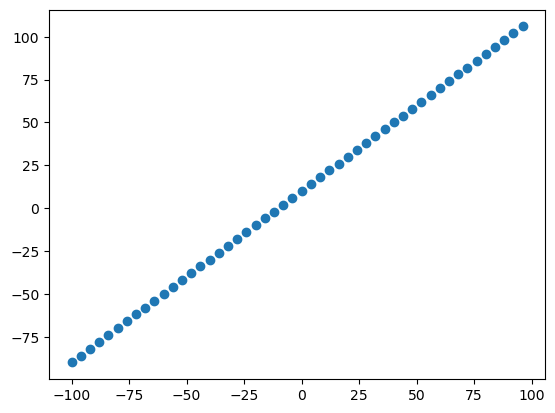

In [30]:
#visulizing the data
import matplotlib.pyplot as plt

plt.scatter(x,y)

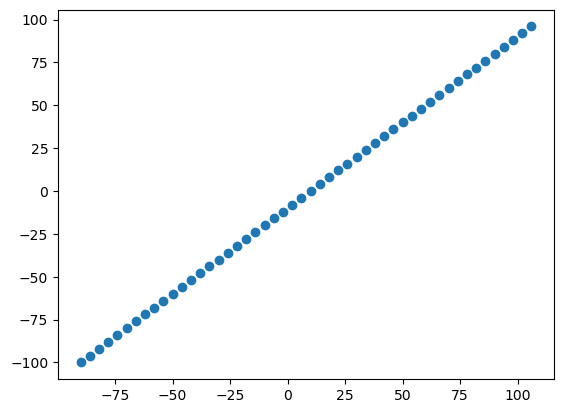

In [31]:
plt.scatter(y,x)

### The 3 sets...
***Traning set***-the model learns from this data,which is typically 70-80% of the total data i have available.

***Validation set***- the model gets tuned on this data, which is typically 10-15% of the data available.

***Test set***- the model gets evaluated on this data to test what is has learned, this set typically 10-15% of the total data available

In [32]:
#check the length of how many samples we have
len(x)

50

In [33]:
#Split the data into train and test set
x_train=x[:40]
y_train=y[:40]
x_test=x[40:]
y_test=y[40:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

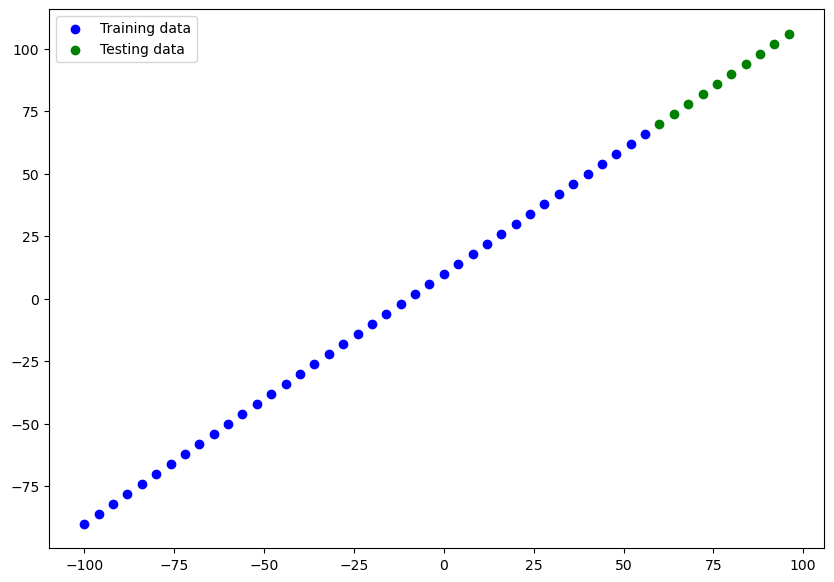

In [34]:
#visualizing the data
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train,y_train,c="b",label="Training data")
#plot training data in green
plt.scatter(x_test,y_test,c="g",label="Testing data")
#Show a legend
plt.legend();

In [35]:
# Lets have a look at how to build a neural nwtwork for our data

#1.Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)
# 3. Fit the model
# model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

In [36]:
x[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [50]:
#Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

#1.create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2.compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

In [51]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
#lets fit our model to the training data
model.fit(x_train,y_train,epochs=100,verbose=0)

2023-08-20 12:00:18.830729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [53]:
#get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


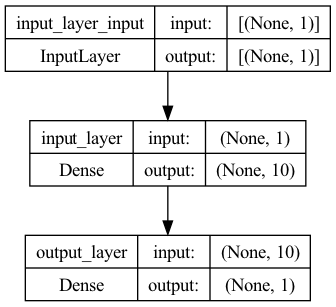

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)